** Import the required libraries and dataset and explore it! **

In [0]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [296]:
# import dataset from pc
from google.colab import files
uploaded = files.upload()

# Source of dataset: Kaggle

Saving house_price.csv to house_price (2).csv


In [297]:
# first 5 rows of dataset
train_set = pd.read_csv('house_price.csv')
train_set.head()

,Id,LotArea,HouseStyle,OverallQual,YearBuilt,RoofStyle,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,WoodDeckSF,TotalBsmtSF,1stFlrSF,SalePrice
0,1,8450,2Story,7,2003,Gable,1710,3,1,8,548,0,856,856,208500
1,2,9600,1Story,6,1976,Gable,1262,3,1,6,460,298,1262,1262,181500
2,3,11250,2Story,7,2001,Gable,1786,3,1,6,608,0,920,920,223500
3,4,9550,2Story,7,1915,Gable,1717,3,1,7,642,0,756,961,140000
4,5,14260,2Story,8,2000,Gable,2198,4,1,9,836,192,1145,1145,250000


In [298]:
# vector of all column names
col_names_train = train_set.columns.values.tolist()
col_names_train

['Id',
 'LotArea',
 'HouseStyle',
 'OverallQual',
 'YearBuilt',
 'RoofStyle',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'GarageArea',
 'WoodDeckSF',
 'TotalBsmtSF',
 '1stFlrSF',
 'SalePrice']

** Summarize target variable **

In [299]:
target = 'SalePrice'

import seaborn as sns 
train_set[target].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


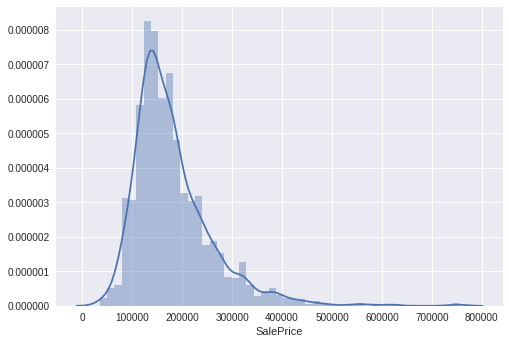

In [300]:
sns.distplot(train_set[target])
# It shows positive skewness and deviation from normal distribution:

# sns.distplot(np.log1p(train_set[target]))

In [301]:
#skewness and kurtosis
print("Skewness: %f" % train_set[target].skew())
print("Kurtosis: %f" % train_set[target].kurt())

#print("Skewness: %f" % np.log1p(train_set[target]).skew())
#print("Kurtosis: %f" % np.log1p(train_set[target]).kurt())

Skewness: 1.882876
Kurtosis: 6.536282


** Missing Data **

In [302]:
# missing data for all columns
train_null = train_set.isnull().sum()
train_null

# Hence, No missing data

Id              0
LotArea         0
HouseStyle      0
OverallQual     0
YearBuilt       0
RoofStyle       0
GrLivArea       0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
GarageArea      0
WoodDeckSF      0
TotalBsmtSF     0
1stFlrSF        0
SalePrice       0
dtype: int64

** Handle numerical and categorical variables separately **

In [303]:
# split into numerical and categorical variables

# dataframe corresp. to numerical variables
train_num = pd.DataFrame() 

train_num['LotArea'] = train_set['LotArea']
train_num['OverallQual'] = train_set['OverallQual']
train_num['YearBuilt'] = train_set['YearBuilt']
train_num['GrLivArea'] = train_set['GrLivArea']
train_num['BedroomAbvGr'] = train_set['BedroomAbvGr']
train_num['KitchenAbvGr'] = train_set['KitchenAbvGr']
train_num['TotRmsAbvGrd'] = train_set['TotRmsAbvGrd']
train_num['GarageArea'] = train_set['GarageArea']
train_num['WoodDeckSF'] = train_set['WoodDeckSF']
train_num['TotalBsmtSF'] = train_set['TotalBsmtSF']
train_num['1stFlrSF'] = train_set['1stFlrSF'] 

train_num.head()

,LotArea,OverallQual,YearBuilt,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,WoodDeckSF,TotalBsmtSF,1stFlrSF
0,8450,7,2003,1710,3,1,8,548,0,856,856
1,9600,6,1976,1262,3,1,6,460,298,1262,1262
2,11250,7,2001,1786,3,1,6,608,0,920,920
3,9550,7,1915,1717,3,1,7,642,0,756,961
4,14260,8,2000,2198,4,1,9,836,192,1145,1145


In [304]:
# dataframe corresp. to categorical variables

train_cat = pd.DataFrame()
train_cat['HouseStyle'] = train_set['HouseStyle']
train_cat['RoofStyle'] = train_set['RoofStyle']

train_cat.head()

,HouseStyle,RoofStyle
0,2Story,Gable
1,1Story,Gable
2,2Story,Gable
3,2Story,Gable
4,2Story,Gable


** target variable **

In [305]:
# convert target variable into matrix (n*1)

y_train = train_set[target]
y_train = np.matrix(y_train).transpose()
np.shape(y_train)

(1460, 1)

** Plots to explore relationships b/w numerical and categorical variables with target variable **

*** 1) numerical variables ***

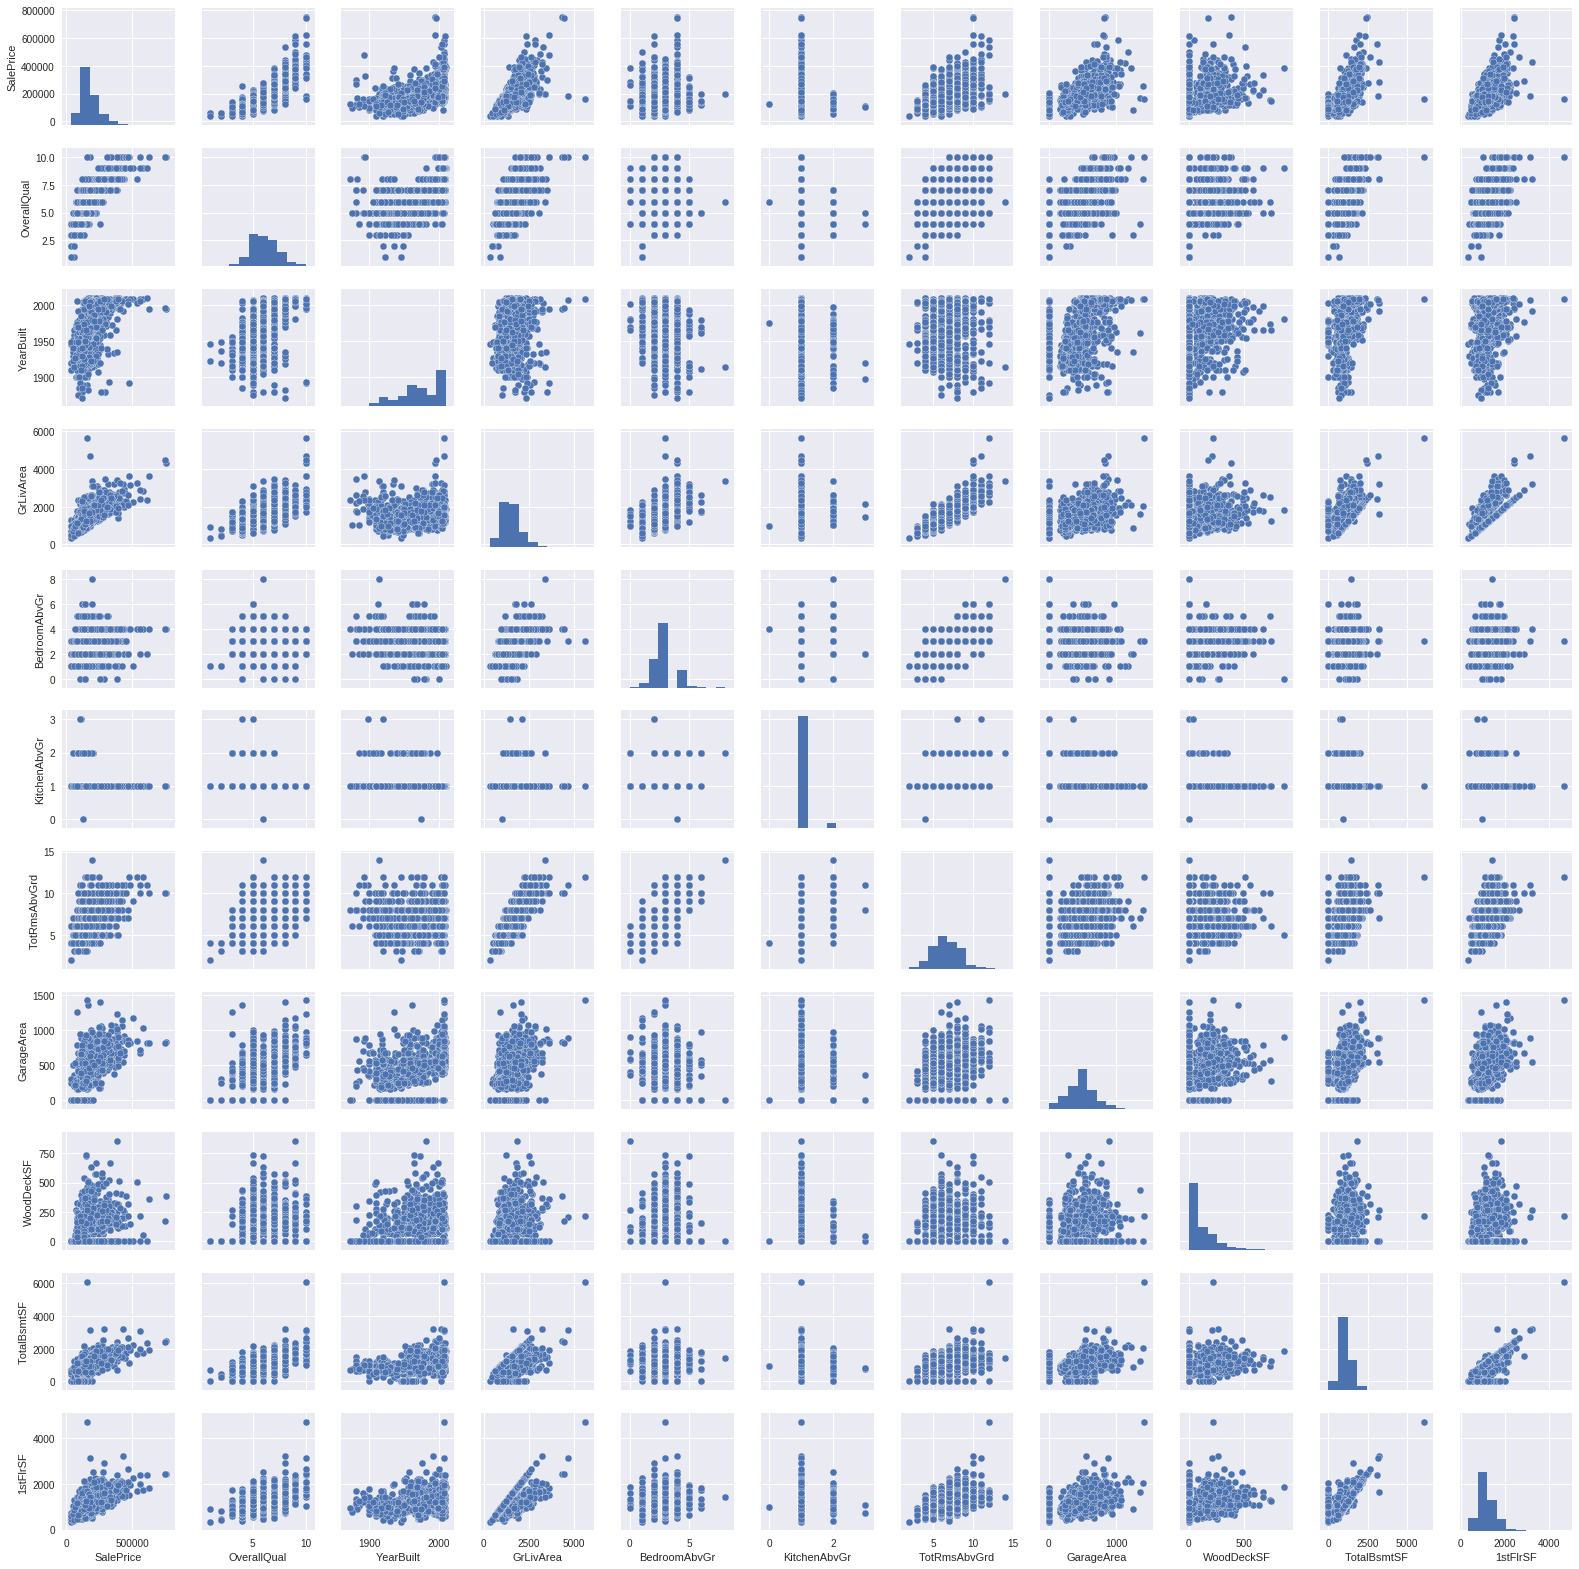

In [306]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'YearBuilt', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF', 'TotalBsmtSF', '1stFlrSF']
sns.pairplot(train_set[cols], size = 2)
plt.show();


**  Some interesting Obervations **:

1. 'SalePrice' vs 'GrLivArea' : Linear relationship
2. 'SalePrice' vs 'TotalBsmtSF' : Linear relationship
3. 'SalePrice' vs '1stFlrSF' : Linear relationship
4. ['GrLivArea', 'TotRmsAbvGrd', 'TotalBsmtSF', '1stFlrSF'] : Linear relationship (Possible Multicollinearity)

*** 2) categorical variables ***

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


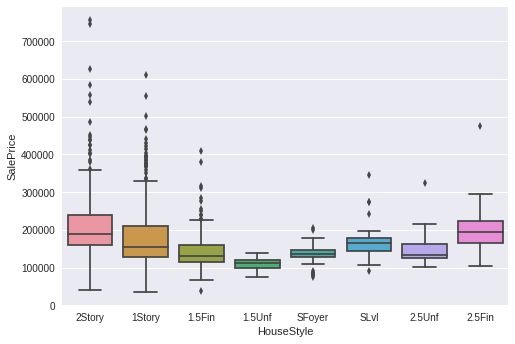

In [307]:
sns.boxplot(x='HouseStyle', y=target, data=train_set)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


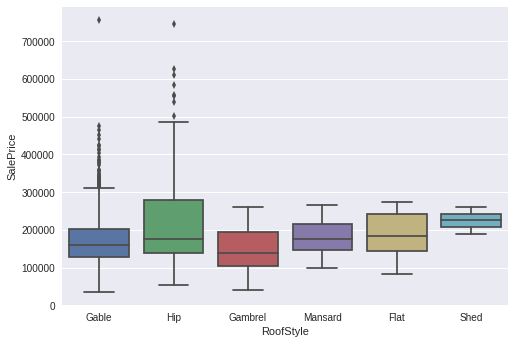

In [308]:
sns.boxplot(x='RoofStyle', y=target, data=train_set)

We will use 2 methods to handle categorical variables : mean encoding (for HouseStyle) and dummy variables (for RoofStyle).

In [0]:
# mean encoding for 'HouseStyle'

HouseStyle_dict = dict(train_set["SalePrice"].groupby(train_set["HouseStyle"]).mean())
train_set['new_HouseStyle'] = train_set["HouseStyle"].map(HouseStyle_dict)

** Fit OLS model on dataset corresp. to only numerical variables. We will handle catgorical variables later. **

In [0]:
X_num = np.array(train_num)

first_col = np.matrix(np.ones(np.shape(X_num)[0])).transpose()
last_col = np.matrix(train_set['new_HouseStyle']).transpose()

# column of 1s is the first column of X
X_num = np.matrix(np.concatenate((first_col, X_num), axis = 1))
X_num = np.matrix(np.concatenate((X_num, last_col), axis = 1))

# beta_num (parameter vector)
beta_num = (np.linalg.inv(X_num.transpose()*X_num))*(X_num.transpose()*y_train)

In [311]:
beta_num

matrix([[-7.15613272e+05],
        [ 5.55037251e-01],
        [ 1.93170035e+04],
        [ 3.45053207e+02],
        [ 4.60269476e+01],
        [-1.03929711e+04],
        [-2.75204101e+04],
        [ 5.86049428e+03],
        [ 3.74505722e+01],
        [ 3.27335085e+01],
        [ 1.58332674e+01],
        [ 1.05359815e+01],
        [-3.57204832e-02]])

In [0]:
# make predictions
y_pred = X_num*np.matrix(beta_num)

In [313]:
# residuals
res = y_train - y_pred
print("Sum of residuals: %f" %sum(res))

# It can be seen that sum(res) is close to 0

Sum of residuals: 0.000164


** Let's study Sum of Squares, R squared, Adjusted R squared and Mean Square Residual**

In [314]:
n = np.shape(X_num)[0]
p = np.shape(X_num)[1]-1
I = np.eye(n)
one_mat = np.ones(n).reshape((n, 1))
P = (1/n)*np.matmul(one_mat, one_mat.transpose())
print(P)

[[0.00068493 0.00068493 0.00068493 ... 0.00068493 0.00068493 0.00068493]
 [0.00068493 0.00068493 0.00068493 ... 0.00068493 0.00068493 0.00068493]
 [0.00068493 0.00068493 0.00068493 ... 0.00068493 0.00068493 0.00068493]
 ...
 [0.00068493 0.00068493 0.00068493 ... 0.00068493 0.00068493 0.00068493]
 [0.00068493 0.00068493 0.00068493 ... 0.00068493 0.00068493 0.00068493]
 [0.00068493 0.00068493 0.00068493 ... 0.00068493 0.00068493 0.00068493]]


In [315]:
SSt = y_train.transpose()*(I-P)*y_train

Px = X_num*np.linalg.inv(X_num.transpose()*X_num)*X_num.transpose()

SSres = y_train.transpose()*(I-Px)*y_train

SSreg = SSt - SSres

R2 = 1 - SSres/SSt
print("R2: %f" %R2)

R2: 0.786368


In [316]:
Adj_R2 = 1 - SSres*(n-1)/(SSt*(n-p-1))
print("Adj_R2: %f" %Adj_R2)

Adj_R2: 0.784597


In [317]:
MSres = SSres/(n-p-1)
print("MSres: %f" %MSres)

MSres: 1359433856.135225


In [318]:
import statsmodels.api as sm

model = sm.OLS(endog = y_train, exog = X_num).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     443.9
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:09:39   Log-Likelihood:                -17417.
No. Observations:                1460   AIC:                         3.486e+04
Df Residuals:                    1447   BIC:                         3.493e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.156e+05   8.31e+04     -8.608      0.000   -8.79e+05   -5.53e+05
x1             0.5550      0.104      5.330      0.000       0.351       0.759
x2          1.932e+04   1163.523     16.602      0.000     1.7e+04    2.16e+04
x3           345.0532     44.603      7.736      0.000     257.560     432.546
x4            46.0269      4.262     10.800      0.000      37.667      54.387
x5         -1.039e+04   1712.172     -6.070      0.000   -1.38e+04   -7034.366
x6         -2.752e+04   4909.668     -5.605      0.000   -3.72e+04   -1.79e+04
x7          5860.4943   1281.283      4.574      0.000    3347.123    8373.865
x8            37.4506      6.029      6.211      0.000      25.623      49.278
x9            32.7335      8.203      3.990      0.000      16.642      48.825
x10           15.8333      4.169      3.798      0.000       7.655      24.012
x11           10.5360      5.189      2.030      0.043       0.357      20.715
x12           -0.0357      0.053     -0.668      0.504      -0.141       0.069
==============================================================================
Omnibus:                      641.028   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96261.825
Skew:                          -0.965   Prob(JB):                         0.00
Kurtosis:                      42.732   Cond. No.                     1.57e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

** Testing of Hypothesis **

*** Test 1: Significance of Regression ***

In [319]:
F_obs = (SSreg*(n-p-1))/(SSres*p)
print("F_obs: %f" %F_obs)

# Note: for alpha = 0.05, p = 11, n-p-1 = 1448, F-value is between [1.8, 1.9]
# Source: http://www.socr.ucla.edu/applets.dir/f_table.html

F_obs: 443.861889



*** Since F_obs is significantly large, Regression is significant ***

** Test 2:  Significance of each regressor **

In [0]:
X_X_inv = np.linalg.inv(X_num.transpose()*X_num)

t = np.zeros(p)

# t-statistics
for i in range(p):
  t[i] = beta_num[i]/(MSres*(X_X_inv.item(i, i)))  
  
# Note: for alpha = 0.05, p = 11, n-p-1 = 1448, t-value is 1.96
# https://home.ubalt.edu/ntsbarsh/business-stat/StatistialTables.pdf  

In [0]:
t = abs(t)

sig_vec = np.zeros(p)
for i in range(len(t)):
  if t[i] > 1.96:
    sig_vec[i] = 1

In [322]:
print(sig_vec)

[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Conclusion : only 2 regressors are significant.

*** log transformation of target variable ***

In [323]:
y_train_logged = np.log1p(y_train)

beta_logged = (np.linalg.inv(X_num.transpose()*X_num))*(X_num.transpose()*y_train_logged)

y_pred_logged = X_num*np.matrix(beta_logged)

res_logged = y_train_logged - y_pred_logged
print("sum of residuals %f" %sum(res_logged))

SSt_logged = y_train_logged.transpose()*(I-P)*y_train_logged

Px = X_num*np.linalg.inv(X_num.transpose()*X_num)*X_num.transpose()

SSres_logged = y_train_logged.transpose()*(I-Px)*y_train_logged

SSreg_logged = SSt_logged - SSres_logged

R2_logged = 1 - SSres_logged/SSt_logged
print("R2: %f" %R2_logged)

Adj_R2_logged = 1 - SSres_logged*(n-1)/(SSt_logged*(n-p-1))
print("Adj_R2: %f" %Adj_R2_logged)

MSres_logged = SSres_logged/(n-p-1)
print("MSres: %f" %MSres_logged)

sum of residuals -0.000000
R2: 0.823357
Adj_R2: 0.821892
MSres: 0.028419


In [324]:
model = sm.OLS(endog = y_train_logged, exog = X_num).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     562.1
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:09:39   Log-Likelihood:                 534.19
No. Observations:                1460   AIC:                            -1042.
Df Residuals:                    1447   BIC:                            -973.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7037      0.380     15.005      0.000       4.958       6.449
x1          2.847e-06   4.76e-07      5.980      0.000    1.91e-06    3.78e-06
x2             0.1050      0.005     19.734      0.000       0.095       0.115
x3             0.0026      0.000     12.858      0.000       0.002       0.003
x4             0.0002   1.95e-05      9.453      0.000       0.000       0.000
x5            -0.0040      0.008     -0.508      0.612      -0.019       0.011
x6            -0.1363      0.022     -6.071      0.000      -0.180      -0.092
x7             0.0204      0.006      3.481      0.001       0.009       0.032
x8             0.0002   2.76e-05      8.462      0.000       0.000       0.000
x9             0.0002   3.75e-05      4.746      0.000       0.000       0.000
x10         5.701e-05   1.91e-05      2.990      0.003    1.96e-05    9.44e-05
x11         5.721e-05   2.37e-05      2.411      0.016    1.07e-05       0.000
x12        -1.709e-07   2.45e-07     -0.699      0.485   -6.51e-07    3.09e-07
==============================================================================
Omnibus:                     1078.686   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58875.760
Skew:                          -2.875   Prob(JB):                         0.00
Kurtosis:                      33.574   Cond. No.                     1.57e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

** Testing of Hypothesis **

*** Test 1: Significance of Regression ***

In [325]:
F_obs_logged = (SSreg_logged*(n-p-1))/(SSres_logged*p)
print("F_obs: %f" %F_obs_logged)

F_obs: 562.054874



*** Since F_obs is significantly large, Regression is significant ***

** Test 2:  Significance of each regressor **

In [0]:
X_X_inv = np.linalg.inv(X_num.transpose()*X_num)

t_new = np.zeros(p)

# t-statistics
for i in range(p):
  t_new[i] = beta_logged[i]/(MSres_logged*(X_X_inv.item(i, i)))  
  
# Note: for alpha = 0.05, p = 11, n-p-1 = 1448, t-value is 1.96
# https://home.ubalt.edu/ntsbarsh/business-stat/StatistialTables.pdf

In [0]:
t_new = abs(t_new)

sig_vec_new = np.zeros(p)
for i in range(len(t_new)):
  if t_new[i] > 1.96:
    sig_vec_new[i] = 1

In [328]:
print(sig_vec_new)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


*** Conclusion : After log transformation, all regressors became significant ***

** Check for violation of assumptions **

** 1. Residual Analysis **

In [329]:
# a) standardized residuals (to identify outliers)

d_vec = res_logged/np.sqrt(MSres_logged) # d_i's
pot_outliers_indices_1 = np.where(abs(d_vec) > 3)[0]
print("outlier indices : ", pot_outliers_indices_1)

outlier indices :  [  30  218  398  410  462  495  523  632  812  916  968 1298 1324]


In [330]:
# b) studentized residuals (to identify outliers)

r_vec = np.zeros(n)

for i in range(n):
  r_vec[i] = res_logged.item(i)/(np.sqrt(MSres_logged * (1 - Px.item((i, i)))))

pot_outliers_indices_2 = np.where(abs(r_vec) > 3)[0]
print("outlier indices : ", pot_outliers_indices_2)

# Observation: same indices as in d_vec

outlier indices :  [  30  218  398  410  462  495  523  632  812  916  968 1298 1324]


In [331]:
# c) PRESS residuals (to identify influential observations)

press_res = np.zeros(n)

for i in range(n):
  press_res[i] = res_logged.item(i)/(1 - Px.item((i, i)))

R2_pred = 1 - sum(press_res**2)/SSt_logged
print("R2 pred: %f" %R2_pred.item(0))

R2 pred: 0.810607


In [332]:
# d) R-student residual

s_i = np.zeros(n)

for i in range(n):
  s_i[i] = ((n-p-1)*MSres_logged - (res_logged.item(i)**2)/(1 - Px.item((i, i))))/(n-p-2)
  
r_stu_res = np.zeros(n)

for i in range(n):
   r_stu_res[i] = res_logged.item(i)/(np.sqrt(s_i[i]*(1 - Px.item((i, i)))))

pot_inf_obs_1 = np.where(abs(r_stu_res) > 3)[0]
print("influential observation indices : ", pot_inf_obs_1)

# Observation: same indices as in r_vec and d_vec

influential observation indices :  [  30  218  398  410  462  495  523  632  812  916  968 1298 1324]


** Handle outliers based on results of residual analysis. For now, we are deleting these outliers. However, it may NOT always be a good idea to do so as these outlier points may give us some interesting insights about data which requires in-depth analysis.**

In [333]:
# delete outliers and re-fit OLS model

train_set_out = train_set.drop(train_set.index[pot_inf_obs_1])
train_num_out = train_num.drop(train_num.index[pot_inf_obs_1])
train_cat_out = train_cat.drop(train_cat.index[pot_inf_obs_1])

X_num_out = np.matrix(np.delete(X_num, pot_inf_obs_1, 0))

# Don't forget to delete outliers corresp. to categorical variables when you move to dummy variables
# X_cat_out = np.delete(X_cat, pot_inf_obs_1, 0)

y_train_out = np.matrix(np.delete(y_train_logged, pot_inf_obs_1, None)).transpose()

beta_out = np.linalg.inv(X_num_out.transpose()*X_num_out)*(X_num_out.transpose()*y_train_out)

y_pred_out = X_num_out*np.matrix(beta_out)

res_out = y_train_out - y_pred_out
print("sum of residuals %f" %sum(res_out))

n_out = np.shape(X_num_out)[0]
I_out = np.eye(n_out)
one_mat_out = np.ones(n_out).reshape((n_out, 1))
P_out = (1/n_out)*np.matmul(one_mat_out, one_mat_out.transpose())

SSt_out = y_train_out.transpose()*(I_out-P_out)*y_train_out

Px_out = X_num_out*np.linalg.inv(X_num_out.transpose()*X_num_out)*X_num_out.transpose()

SSres_out = y_train_out.transpose()*(I_out-Px_out)*y_train_out

SSreg_out = SSt_out - SSres_out

R2_out = 1 - SSres_out/SSt_out
print("R2: %f" %R2_out)

Adj_R2_out = 1 - SSres_out*(n_out-1)/(SSt_out*(n_out-p-1))
print("Adj_R2: %f" %Adj_R2_out)

MSres_out = SSres_out/(n_out-p-1)
print("MSres: %f" %MSres_out)

F_obs_out = (SSreg_out*(n_out-p-1))/(SSres_out*p)
print("F_obs: %f" %F_obs_out)

# R-student residual
s_i_out = np.zeros(n_out)

for i in range(n_out):
  s_i_out[i] = ((n_out-p-1)*MSres_out - (res_out.item(i)**2)/(1 - Px_out.item((i, i))))/(n_out-p-2)
  
r_stu_res_out = np.zeros(n_out)

for i in range(n_out):
   r_stu_res_out[i] = res_out.item(i)/(np.sqrt(s_i_out[i]*(1 - Px_out.item((i, i)))))


sum of residuals 0.000000
R2: 0.881777
Adj_R2: 0.880788
MSres: 0.018030
F_obs: 891.304948


In [334]:
model = sm.OLS(endog = y_train_out, exog = X_num_out).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     891.3
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:09:40   Log-Likelihood:                 858.71
No. Observations:                1447   AIC:                            -1691.
Df Residuals:                    1434   BIC:                            -1623.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0084      0.304     19.780      0.000       5.413       6.604
x1          3.241e-06    3.8e-07      8.532      0.000     2.5e-06    3.99e-06
x2             0.0859      0.004     19.895      0.000       0.077       0.094
x3             0.0025      0.000     15.195      0.000       0.002       0.003
x4             0.0003    1.6e-05     16.701      0.000       0.000       0.000
x5            -0.0217      0.006     -3.449      0.001      -0.034      -0.009
x6            -0.1462      0.018     -8.169      0.000      -0.181      -0.111
x7             0.0104      0.005      2.207      0.027       0.001       0.020
x8             0.0002    2.2e-05      9.728      0.000       0.000       0.000
x9             0.0001      3e-05      3.966      0.000    6.01e-05       0.000
x10            0.0001   1.57e-05      9.222      0.000       0.000       0.000
x11         3.467e-05    1.9e-05      1.826      0.068   -2.57e-06    7.19e-05
x12         1.208e-07   1.96e-07      0.617      0.537   -2.63e-07    5.05e-07
==============================================================================
Omnibus:                       75.346   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.447
Skew:                          -0.375   Prob(JB):                     3.18e-31
Kurtosis:                       4.329   Cond. No.                     1.57e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*** Conclusion : Improvement in both R2 and Adj_R2 ***

** Q-Q Plot (to check normality assumption)**

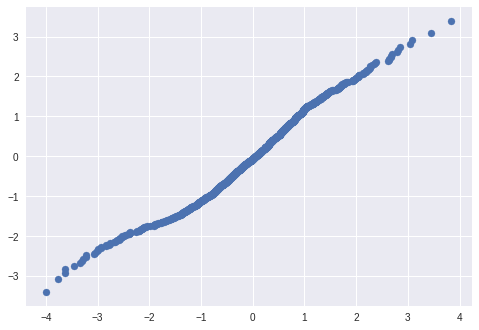

In [335]:
# we first order the r-student residuals

from scipy.stats import norm

r_stu_res_out_sorted = np.sort(r_stu_res_out)
P_i_out = np.zeros(n_out);

for i in range(n_out):
  P_i_out[i] = norm.ppf((i + 0.5)/n_out) # since 'i' start from 0

plt.scatter(r_stu_res_out_sorted, P_i_out)

*** Conclusion : Since, it is nearly a straight line, normality assumption is strengthened ***

** Plot of residuals against the fitted values **

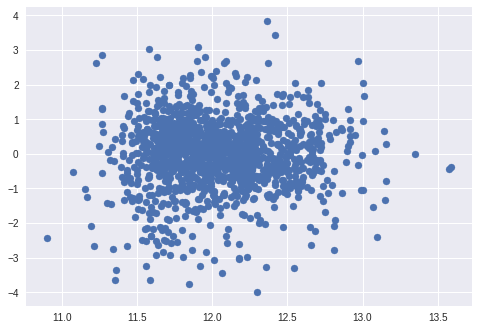

In [336]:
plt.scatter(np.array(y_pred_out), np.array(r_stu_res_out))

*** The points are arranged randomly within a horizontal band without any order. ***

** Plot of residuals against the regressors **

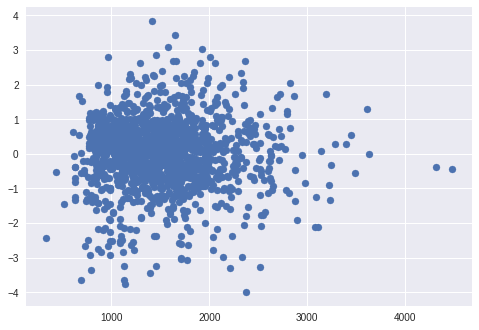

In [337]:
plt.scatter(train_set_out['GrLivArea'], r_stu_res_out)

horizontal band (no transformation reqd)

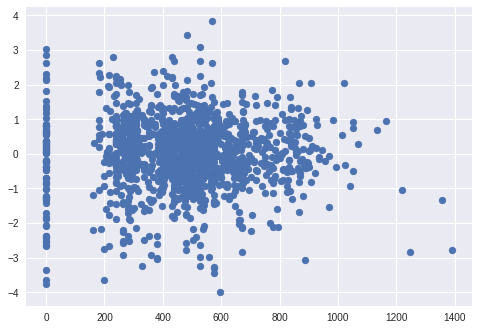

In [338]:
plt.scatter(train_set_out['GarageArea'], r_stu_res_out)

horizontal band (no transformation reqd)

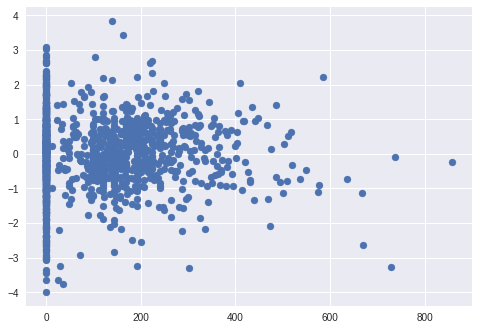

In [339]:
plt.scatter(train_set_out['WoodDeckSF'], r_stu_res_out)

horizontal band (no transformation reqd)

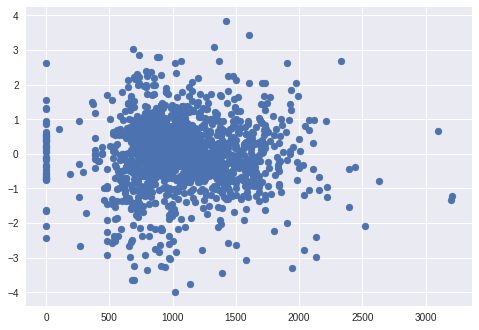

In [340]:
plt.scatter(train_set_out['TotalBsmtSF'], r_stu_res_out)

horizontal band (no transformation reqd)

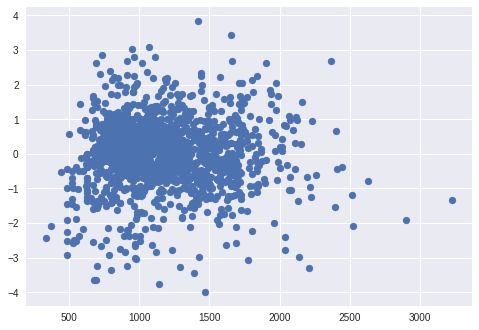

In [341]:
plt.scatter(train_set_out['1stFlrSF'], r_stu_res_out)

horizontal band (no transformation reqd)

** Plot of residuals in time sequence **

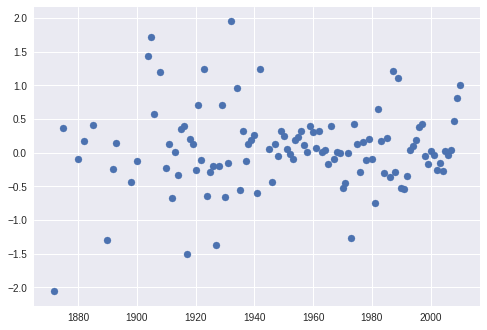

In [342]:
time_df = pd.DataFrame()
time_df['yr'] = train_set_out['YearBuilt']
time_df['res'] = r_stu_res_out

time_df_dict = dict(time_df['res'].groupby(time_df['yr']).mean())                          
plt.scatter(time_df_dict.keys(), time_df_dict.values())

*** Mostly, the residuals are fluctuating randomly within a horizontal band without any order. So, no corrective measures are required. ***

** Handle Multicollinearity Problem **

*** 1) Correlation matrix for binary correlations among numerical variables ***

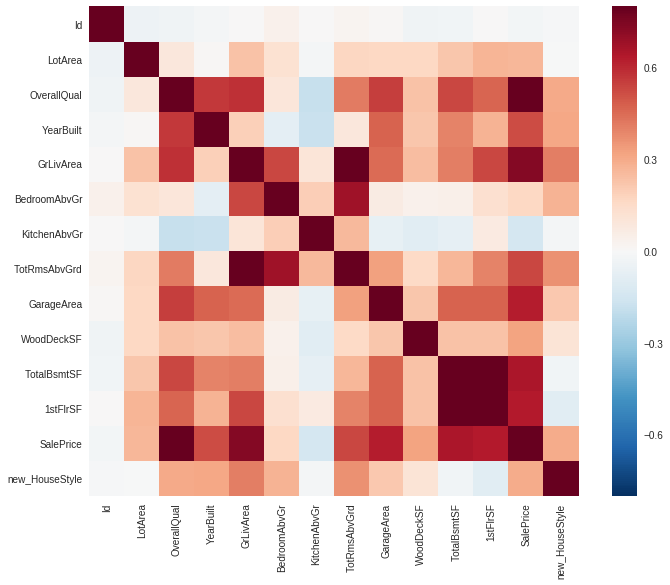

In [343]:
corrmat = train_set_out.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

*** 2) Variance Decomposition Method***

In [0]:
# normalization of X and y
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

X_num_out_scaled = np.matrix(sc_x.fit_transform(X_num_out))
X_num_out_scaled = np.delete(X_num_out_scaled, 0, axis = 1) # drop first column of 0s after normalization
X_num_out_scaled/=np.sqrt(n_out) # divide by sqrt(n) to make it identical to unit-length scaling

sc_y = StandardScaler()
y_train_out_scaled = np.matrix(sc_y.fit_transform(y_train_out))
y_train_out_scaled/=np.sqrt(n_out) # divide by sqrt(n) to make it identical to unit-length scaling

In [0]:
# SVD of X

svd_res = np.linalg.svd(X_num_out_scaled, full_matrices=True, compute_uv=True)
svd_res
U = np.matrix(svd_res[0])
V_trans = np.matrix(svd_res[2])

In [346]:
D = np.zeros((n_out, p))

for i in range(p):
  D[i][i] = svd_res[1][i]

D = np.matrix(D)
print(D)

[[2.04533148 0.         0.         ... 0.         0.         0.        ]
 [0.         1.4088576  0.         ... 0.         0.         0.        ]
 [0.         0.         1.18838634 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [347]:
D_sq = D.transpose()*D
eig_vals = np.zeros(p)

for i in range(p):
  eig_vals[i] = D_sq.item(i, i)

l_max = max(eig_vals)
l_min = min(eig_vals)
print(np.sqrt(l_max/l_min))

6.001761199654492


** Since, the maximum condition number is less than 30, no respecification is needed, let us check VIFs**

*** Variable Selection ***

In [196]:
# Backward Elimination

"""
import statsmodels.formula.api as sm

X_num_out_opt = X_num_out[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
model = sm.OLS(endog = y_train_out, exog = X_num_out_opt).fit()
model.summary()
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     891.3
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        18:32:16   Log-Likelihood:                 858.71
No. Observations:                1447   AIC:                            -1691.
Df Residuals:                    1434   BIC:                            -1623.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0084      0.304     19.780      0.000       5.413       6.604
x1          3.241e-06    3.8e-07      8.532      0.000     2.5e-06    3.99e-06
x2             0.0859      0.004     19.895      0.000       0.077       0.094
x3             0.0025      0.000     15.195      0.000       0.002       0.003
x4             0.0003    1.6e-05     16.701      0.000       0.000       0.000
x5            -0.0217      0.006     -3.449      0.001      -0.034      -0.009
x6            -0.1462      0.018     -8.169      0.000      -0.181      -0.111
x7             0.0104      0.005      2.207      0.027       0.001       0.020
x8             0.0002    2.2e-05      9.728      0.000       0.000       0.000
x9             0.0001      3e-05      3.966      0.000    6.01e-05       0.000
x10            0.0001   1.57e-05      9.222      0.000       0.000       0.000
x11         3.467e-05    1.9e-05      1.826      0.068   -2.57e-06    7.19e-05
x12         1.208e-07   1.96e-07      0.617      0.537   -2.63e-07    5.05e-07
==============================================================================
Omnibus:                       75.346   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.447
Skew:                          -0.375   Prob(JB):                     3.18e-31
Kurtosis:                       4.329   Cond. No.                     1.57e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
"""
X_num_out_opt = X_num_out[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
model = sm.OLS(endog = y_train_out, exog = X_num_out_opt).fit()
model.summary()
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     972.7
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        18:32:25   Log-Likelihood:                 858.52
No. Observations:                1447   AIC:                            -1693.
Df Residuals:                    1435   BIC:                            -1630.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9674      0.296     20.137      0.000       5.386       6.549
x1          3.235e-06    3.8e-07      8.522      0.000    2.49e-06    3.98e-06
x2             0.0858      0.004     19.891      0.000       0.077       0.094
x3             0.0025      0.000     16.197      0.000       0.002       0.003
x4             0.0003   1.53e-05     17.714      0.000       0.000       0.000
x5            -0.0216      0.006     -3.430      0.001      -0.034      -0.009
x6            -0.1462      0.018     -8.171      0.000      -0.181      -0.111
x7             0.0105      0.005      2.234      0.026       0.001       0.020
x8             0.0002    2.2e-05      9.761      0.000       0.000       0.000
x9             0.0001      3e-05      3.973      0.000    6.03e-05       0.000
x10            0.0001   1.57e-05      9.228      0.000       0.000       0.000
x11         3.082e-05   1.79e-05      1.719      0.086   -4.34e-06     6.6e-05
==============================================================================
Omnibus:                       74.535   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.985
Skew:                          -0.371   Prob(JB):                     6.60e-31
Kurtosis:                       4.324   Cond. No.                     1.22e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [198]:
"""
X_num_out_opt = X_num_out[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
model = sm.OLS(endog = y_train_out, exog = X_num_out_opt).fit()
model.summary()
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1068.
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        18:32:50   Log-Likelihood:                 857.03
No. Observations:                1447   AIC:                            -1692.
Df Residuals:                    1436   BIC:                            -1634.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0021      0.296     20.288      0.000       5.422       6.582
x1          3.292e-06   3.78e-07      8.698      0.000    2.55e-06    4.03e-06
x2             0.0851      0.004     19.805      0.000       0.077       0.094
x3             0.0025      0.000     16.115      0.000       0.002       0.003
x4             0.0003   1.49e-05     18.612      0.000       0.000       0.000
x5            -0.0230      0.006     -3.669      0.000      -0.035      -0.011
x6            -0.1416      0.018     -7.998      0.000      -0.176      -0.107
x7             0.0107      0.005      2.280      0.023       0.001       0.020
x8             0.0002   2.19e-05      9.989      0.000       0.000       0.000
x9             0.0001      3e-05      4.015      0.000    6.16e-05       0.000
x10            0.0002   1.08e-05     15.266      0.000       0.000       0.000
==============================================================================
Omnibus:                       74.147   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.616
Skew:                          -0.369   Prob(JB):                     7.94e-31
Kurtosis:                       4.325   Cond. No.                     1.22e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

** Handle Categorical Variables **

In [0]:
# convert categorical variables to dummy variables

X_cat_df = pd.DataFrame()

# X_cat_df = pd.concat([X_cat_df, pd.get_dummies(train_cat['HouseStyle'], drop_first = True, prefix="_" + 'HouseStyle')], axis = 1)
X_cat_df = pd.concat([X_cat_df, pd.get_dummies(train_cat['RoofStyle'], drop_first = True, prefix="_" + 'RoofStyle')], axis = 1)

X_cat = np.array(X_cat_df)
X_cat_out = np.delete(X_cat, pot_inf_obs_1, 0)

In [0]:
X_new_out = np.concatenate((X_num_out, X_cat_out), axis = 1)

In [352]:
y_train_new_out = y_train_out

beta_new_out = (np.linalg.inv(X_new_out.transpose()*X_new_out))*(X_new_out.transpose()*y_train_new_out)

y_pred_new_out = X_new_out*beta_new_out

res_out_new_out = y_train_new_out - y_pred_new_out
print("sum of residuals %f" %sum(res_out_new_out))

n_new_out = np.shape(X_new_out)[0]
p_new_out = np.shape(X_new_out)[1] - 1
I_new_out = np.eye(n_new_out)
one_mat_new_out = np.ones(n_new_out).reshape((n_new_out, 1))
P_new_out = (1/n_new_out)*np.matmul(one_mat_new_out, one_mat_new_out.transpose())

SSt_new_out = y_train_new_out.transpose()*(I_new_out-P_new_out)*y_train_new_out

Px_new_out = X_new_out*np.linalg.inv(X_new_out.transpose()*X_new_out)*X_new_out.transpose()

SSres_new_out = y_train_new_out.transpose()*(I_new_out-Px_new_out)*y_train_new_out
                     
SSreg_new_out= SSt_new_out - SSres_new_out

R2_new_out = 1 - SSres_new_out/SSt_new_out
print("R2: %f" %R2_new_out)

Adj_R2_new_out = 1 - SSres_new_out*(n_new_out-1)/(SSt_new_out*(n_new_out-p_new_out-1))
print("Adj_R2: %f" %Adj_R2_new_out)

MSres_new_out = SSres_new_out/(n_new_out-p_new_out-1)
print("MSres: %f" %MSres_new_out)

F_obs_new_out = (SSreg_new_out*(n_new_out-p_new_out-1))/(SSres_new_out*p_new_out)
print("F_obs: %f" %F_obs_new_out)

sum of residuals -0.000000
R2: 0.882504
Adj_R2: 0.881106
MSres: 0.017982
F_obs: 631.360580


In [0]:
# normalization of X and y
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

X_new_out_scaled = np.matrix(sc_x.fit_transform(X_new_out))
X_new_out_scaled = np.delete(X_new_out_scaled, 0, axis = 1) # drop first column of 0s after normalization
X_new_out_scaled/=np.sqrt(n_out) # divide by sqrt(n) to make it identical to unit-length scaling

sc_y = StandardScaler()
y_train_out_scaled = np.matrix(sc_y.fit_transform(y_train_new_out))
y_train_out_scaled/=np.sqrt(n_out) # divide by sqrt(n) to make it identical to unit-length scaling


In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(pd.DataFrame(X_new_out_scaled).values, i) for i in range(pd.DataFrame(X_new_out_scaled).shape[1])]
vif["features"] = pd.DataFrame(X_new_out_scaled).columns

In [357]:
vif.round(1)

,VIF Factor,features
0,1.1,0
1,2.8,1
2,2.0,2
3,5.4,3
4,2.1,4
5,1.3,5
6,4.7,6
7,1.7,7
8,1.1,8
9,3.4,9


In [358]:
# Backward Elimination

import statsmodels.formula.api as sm

X_new_out_opt = X_new_out[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]]
model = sm.OLS(endog = y_train_new_out, exog = X_new_out_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     631.4
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:15:13   Log-Likelihood:                 863.17
No. Observations:                1447   AIC:                            -1690.
Df Residuals:                    1429   BIC:                            -1595.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9243      0.308     19.247      0.000       5.320       6.528
x1          3.212e-06   3.81e-07      8.422      0.000    2.46e-06    3.96e-06
x2             0.0854      0.004     19.736      0.000       0.077       0.094
x3             0.0025      0.000     15.413      0.000       0.002       0.003
x4             0.0003   1.62e-05     16.621      0.000       0.000       0.000
x5            -0.0210      0.006     -3.323      0.001      -0.033      -0.009
x6            -0.1448      0.018     -8.057      0.000      -0.180      -0.110
x7             0.0097      0.005      2.058      0.040       0.000       0.019
x8             0.0002    2.2e-05      9.836      0.000       0.000       0.000
x9             0.0001      3e-05      3.962      0.000       6e-05       0.000
x10            0.0001   1.57e-05      9.183      0.000       0.000       0.000
x11         3.113e-05   1.95e-05      1.596      0.111   -7.14e-06    6.94e-05
x12         8.655e-08   1.97e-07      0.439      0.661      -3e-07    4.73e-07
x13           -0.0286      0.038     -0.751      0.453      -0.103       0.046
x14            0.0867      0.057      1.512      0.131      -0.026       0.199
x15           -0.0184      0.039     -0.477      0.634      -0.094       0.057
x16           -0.0066      0.063     -0.104      0.917      -0.131       0.118
x17            0.0091      0.103      0.088      0.930      -0.193       0.212
==============================================================================
Omnibus:                       79.054   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.443
Skew:                          -0.387   Prob(JB):                     3.54e-33
Kurtosis:                       4.371   Cond. No.                     1.60e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [359]:
X_new_out_opt = X_new_out[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]]
model = sm.OLS(endog = y_train_new_out, exog = X_new_out_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     671.3
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:15:17   Log-Likelihood:                 863.17
No. Observations:                1447   AIC:                            -1692.
Df Residuals:                    1430   BIC:                            -1603.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9244      0.308     19.254      0.000       5.321       6.528
x1          3.211e-06   3.81e-07      8.425      0.000    2.46e-06    3.96e-06
x2             0.0854      0.004     19.752      0.000       0.077       0.094
x3             0.0025      0.000     15.436      0.000       0.002       0.003
x4             0.0003   1.61e-05     16.649      0.000       0.000       0.000
x5            -0.0211      0.006     -3.343      0.001      -0.033      -0.009
x6            -0.1446      0.018     -8.083      0.000      -0.180      -0.110
x7             0.0097      0.005      2.066      0.039       0.000       0.019
x8             0.0002    2.2e-05      9.840      0.000       0.000       0.000
x9             0.0001      3e-05      3.966      0.000    6.01e-05       0.000
x10            0.0001   1.57e-05      9.210      0.000       0.000       0.000
x11         3.096e-05   1.94e-05      1.595      0.111   -7.11e-06     6.9e-05
x12          8.53e-08   1.97e-07      0.434      0.664      -3e-07    4.71e-07
x13           -0.0299      0.035     -0.842      0.400      -0.099       0.040
x14            0.0855      0.056      1.537      0.125      -0.024       0.195
x15           -0.0196      0.036     -0.544      0.586      -0.090       0.051
x16           -0.0078      0.062     -0.126      0.899      -0.129       0.114
==============================================================================
Omnibus:                       79.181   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.670
Skew:                          -0.388   Prob(JB):                     3.16e-33
Kurtosis:                       4.371   Cond. No.                     1.60e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [360]:
X_new_out_opt = X_new_out[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
model = sm.OLS(endog = y_train_new_out, exog = X_new_out_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     716.5
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:15:17   Log-Likelihood:                 863.16
No. Observations:                1447   AIC:                            -1694.
Df Residuals:                    1431   BIC:                            -1610.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9203      0.306     19.357      0.000       5.320       6.520
x1          3.215e-06    3.8e-07      8.454      0.000    2.47e-06    3.96e-06
x2             0.0854      0.004     19.764      0.000       0.077       0.094
x3             0.0025      0.000     15.465      0.000       0.002       0.003
x4             0.0003   1.61e-05     16.660      0.000       0.000       0.000
x5            -0.0211      0.006     -3.352      0.001      -0.033      -0.009
x6            -0.1447      0.018     -8.089      0.000      -0.180      -0.110
x7             0.0097      0.005      2.065      0.039       0.000       0.019
x8             0.0002    2.2e-05      9.843      0.000       0.000       0.000
x9             0.0001      3e-05      3.966      0.000       6e-05       0.000
x10            0.0001   1.57e-05      9.215      0.000       0.000       0.000
x11         3.098e-05   1.94e-05      1.597      0.111   -7.08e-06     6.9e-05
x12         8.439e-08   1.96e-07      0.430      0.667   -3.01e-07     4.7e-07
x13           -0.0274      0.029     -0.932      0.351      -0.085       0.030
x14            0.0881      0.052      1.702      0.089      -0.013       0.190
x15           -0.0171      0.030     -0.569      0.570      -0.076       0.042
==============================================================================
Omnibus:                       78.845   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.018
Skew:                          -0.386   Prob(JB):                     4.38e-33
Kurtosis:                       4.369   Cond. No.                     1.59e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [361]:
X_new_out_opt = X_new_out[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15]]
model = sm.OLS(endog = y_train_new_out, exog = X_new_out_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     768.1
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:15:17   Log-Likelihood:                 863.07
No. Observations:                1447   AIC:                            -1696.
Df Residuals:                    1432   BIC:                            -1617.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8910      0.298     19.766      0.000       5.306       6.476
x1           3.21e-06    3.8e-07      8.448      0.000    2.46e-06    3.96e-06
x2             0.0853      0.004     19.766      0.000       0.077       0.094
x3             0.0026      0.000     16.466      0.000       0.002       0.003
x4             0.0003   1.53e-05     17.646      0.000       0.000       0.000
x5            -0.0210      0.006     -3.339      0.001      -0.033      -0.009
x6            -0.1446      0.018     -8.089      0.000      -0.180      -0.110
x7             0.0098      0.005      2.080      0.038       0.001       0.019
x8             0.0002    2.2e-05      9.871      0.000       0.000       0.000
x9             0.0001   2.99e-05      3.971      0.000    6.02e-05       0.000
x10            0.0001   1.57e-05      9.221      0.000       0.000       0.000
x11         2.815e-05   1.82e-05      1.543      0.123   -7.63e-06    6.39e-05
x12           -0.0278      0.029     -0.947      0.344      -0.085       0.030
x13            0.0881      0.052      1.704      0.089      -0.013       0.190
x14           -0.0171      0.030     -0.569      0.569      -0.076       0.042
==============================================================================
Omnibus:                       78.307   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.088
Skew:                          -0.384   Prob(JB):                     6.97e-33
Kurtosis:                       4.366   Cond. No.                     1.23e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [362]:
X_new_out_opt = X_new_out[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14]]
model = sm.OLS(endog = y_train_new_out, exog = X_new_out_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     827.6
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:15:17   Log-Likelihood:                 862.90
No. Observations:                1447   AIC:                            -1698.
Df Residuals:                    1433   BIC:                            -1624.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8788      0.297     19.781      0.000       5.296       6.462
x1          3.227e-06   3.79e-07      8.517      0.000    2.48e-06    3.97e-06
x2             0.0852      0.004     19.765      0.000       0.077       0.094
x3             0.0026      0.000     16.463      0.000       0.002       0.003
x4             0.0003   1.53e-05     17.800      0.000       0.000       0.000
x5            -0.0211      0.006     -3.354      0.001      -0.033      -0.009
x6            -0.1446      0.018     -8.090      0.000      -0.180      -0.110
x7             0.0096      0.005      2.048      0.041       0.000       0.019
x8             0.0002    2.2e-05      9.870      0.000       0.000       0.000
x9             0.0001   2.99e-05      3.992      0.000    6.08e-05       0.000
x10            0.0001   1.56e-05      9.205      0.000       0.000       0.000
x11         2.828e-05   1.82e-05      1.551      0.121   -7.49e-06    6.41e-05
x12           -0.0119      0.009     -1.295      0.195      -0.030       0.006
x13            0.1039      0.044      2.378      0.018       0.018       0.190
==============================================================================
Omnibus:                       77.124   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.740
Skew:                          -0.379   Prob(JB):                     2.25e-32
Kurtosis:                       4.358   Cond. No.                     1.23e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [363]:
X_new_out_opt = X_new_out[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14]]
model = sm.OLS(endog = y_train_new_out, exog = X_new_out_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     896.0
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:15:18   Log-Likelihood:                 862.06
No. Observations:                1447   AIC:                            -1698.
Df Residuals:                    1434   BIC:                            -1630.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8914      0.297     19.829      0.000       5.309       6.474
x1          3.237e-06   3.79e-07      8.545      0.000    2.49e-06    3.98e-06
x2             0.0855      0.004     19.845      0.000       0.077       0.094
x3             0.0025      0.000     16.409      0.000       0.002       0.003
x4             0.0003   1.52e-05     17.749      0.000       0.000       0.000
x5            -0.0214      0.006     -3.406      0.001      -0.034      -0.009
x6            -0.1458      0.018     -8.168      0.000      -0.181      -0.111
x7             0.0100      0.005      2.128      0.033       0.001       0.019
x8             0.0002    2.2e-05      9.863      0.000       0.000       0.000
x9             0.0001   2.99e-05      4.016      0.000    6.15e-05       0.000
x10            0.0001   1.56e-05      9.200      0.000       0.000       0.000
x11          3.28e-05   1.79e-05      1.832      0.067   -2.32e-06    6.79e-05
x12            0.1140      0.043      2.651      0.008       0.030       0.198
==============================================================================
Omnibus:                       76.550   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.398
Skew:                          -0.379   Prob(JB):                     7.27e-32
Kurtosis:                       4.343   Cond. No.                     1.23e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [364]:
X_new_out_opt = X_new_out[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14]]
model = sm.OLS(endog = y_train_new_out, exog = X_new_out_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     975.5
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:15:18   Log-Likelihood:                 860.36
No. Observations:                1447   AIC:                            -1697.
Df Residuals:                    1435   BIC:                            -1633.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9304      0.297     19.996      0.000       5.349       6.512
x1          3.297e-06   3.78e-07      8.730      0.000    2.56e-06    4.04e-06
x2             0.0847      0.004     19.745      0.000       0.076       0.093
x3             0.0025      0.000     16.316      0.000       0.002       0.003
x4             0.0003   1.48e-05     18.671      0.000       0.000       0.000
x5            -0.0229      0.006     -3.660      0.000      -0.035      -0.011
x6            -0.1409      0.018     -7.977      0.000      -0.176      -0.106
x7             0.0102      0.005      2.180      0.029       0.001       0.019
x8             0.0002   2.19e-05     10.097      0.000       0.000       0.000
x9             0.0001   2.99e-05      4.059      0.000    6.28e-05       0.000
x10            0.0002   1.07e-05     15.342      0.000       0.000       0.000
x11            0.1107      0.043      2.575      0.010       0.026       0.195
==============================================================================
Omnibus:                       76.083   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.753
Skew:                          -0.376   Prob(JB):                     1.00e-31
Kurtosis:                       4.342   Cond. No.                     1.22e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*** Now, all variables are significant, so we stop variable seleciton at this point ***

In [365]:
RoofStyle_dict = dict(train_set['SalePrice'].groupby(train_set['RoofStyle']).mean())
RoofStyle_dict

{'Flat': 194690.0,
 'Gable': 171483.95617879054,
 'Gambrel': 148909.0909090909,
 'Hip': 218876.93356643355,
 'Mansard': 180568.42857142858,
 'Shed': 225000.0}

** The small mean of 'Gambrel' Category is probably responsible for retaining it after variable selection ***

*** Fitting OLS model after variable selection ***

In [366]:
model = sm.OLS(endog = y_train_new_out, exog = X_new_out_opt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     975.5
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:15:19   Log-Likelihood:                 860.36
No. Observations:                1447   AIC:                            -1697.
Df Residuals:                    1435   BIC:                            -1633.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9304      0.297     19.996      0.000       5.349       6.512
x1          3.297e-06   3.78e-07      8.730      0.000    2.56e-06    4.04e-06
x2             0.0847      0.004     19.745      0.000       0.076       0.093
x3             0.0025      0.000     16.316      0.000       0.002       0.003
x4             0.0003   1.48e-05     18.671      0.000       0.000       0.000
x5            -0.0229      0.006     -3.660      0.000      -0.035      -0.011
x6            -0.1409      0.018     -7.977      0.000      -0.176      -0.106
x7             0.0102      0.005      2.180      0.029       0.001       0.019
x8             0.0002   2.19e-05     10.097      0.000       0.000       0.000
x9             0.0001   2.99e-05      4.059      0.000    6.28e-05       0.000
x10            0.0002   1.07e-05     15.342      0.000       0.000       0.000
x11            0.1107      0.043      2.575      0.010       0.026       0.195
==============================================================================
Omnibus:                       76.083   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.753
Skew:                          -0.376   Prob(JB):                     1.00e-31
Kurtosis:                       4.342   Cond. No.                     1.22e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

** Multicollinearity Check **

In [367]:
# normalization of X and y
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

X_new_out_scaled = np.matrix(sc_x.fit_transform(X_new_out_opt))
X_new_out_scaled = np.delete(X_new_out_scaled, 0, axis = 1) # drop first column of 0s after normalization
X_new_out_scaled/=np.sqrt(n_out) # divide by sqrt(n) to make it identical to unit-length scaling

sc_y = StandardScaler()
y_train_out_scaled = np.matrix(sc_y.fit_transform(y_train_new_out))
y_train_out_scaled/=np.sqrt(n_out) # divide by sqrt(n) to make it identical to unit-length scaling

# SVD of X

svd_res = np.linalg.svd(X_new_out_scaled, full_matrices=True, compute_uv=True)
svd_res
U = np.matrix(svd_res[0])
V_trans = np.matrix(svd_res[2])

p = np.shape(X_new_out_scaled)[1]

D = np.zeros((n_out, p))

for i in range(p):
  D[i][i] = svd_res[1][i]

D = np.matrix(D)

D_sq = D.transpose()*D
eig_vals = np.zeros(p)

for i in range(p):
  eig_vals[i] = D_sq.item(i, i)

l_max = max(eig_vals)
l_min = min(eig_vals)
print("condition no:", np.sqrt(l_max/l_min))

condition no: 5.223141134450305


In [368]:
eig_vals

array([3.55294943, 1.95565187, 1.03990972, 0.99454011, 0.83725616,
       0.80757353, 0.54476385, 0.49477659, 0.42308536, 0.21925903,
       0.13023434])

** Variance Inflation Factor method **

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(pd.DataFrame(X_new_out_scaled).values, i) for i in range(pd.DataFrame(X_new_out_scaled).shape[1])]
vif["features"] = pd.DataFrame(X_new_out_scaled).columns

In [370]:
vif.round(1)

,VIF Factor,features
0,1.1,0
1,2.8,1
2,1.8,2
3,4.6,3
4,2.1,4
5,1.2,5
6,4.6,6
7,1.7,7
8,1.1,8
9,1.6,9


In [371]:
beta_new_out = (np.linalg.inv(X_new_out_scaled.transpose()*X_new_out_scaled))*(X_new_out_scaled.transpose()*y_train_out_scaled)

y_pred_new_out = X_new_out_scaled*beta_new_out

res_new_out = y_train_out_scaled - y_pred_new_out
print("sum of residuals %f" %sum(res_out_new_out))

n_new_out = np.shape(X_new_out_scaled)[0]
p_new_out = np.shape(X_new_out_scaled)[1]
I_new_out = np.eye(n_new_out)
one_mat_new_out = np.ones(n_new_out).reshape((n_new_out, 1))
P_new_out = (1/n_new_out)*np.matmul(one_mat_new_out, one_mat_new_out.transpose())

SSt_new_out = y_train_out_scaled.transpose()*(I_new_out-P_new_out)*y_train_out_scaled

Px_new_out = X_new_out_scaled*np.linalg.inv(X_new_out_scaled.transpose()*X_new_out_scaled)*X_new_out_scaled.transpose()

SSres_new_out = y_train_out_scaled.transpose()*(I_new_out-Px_new_out)*y_train_out_scaled
                     
SSreg_new_out= SSt_new_out - SSres_new_out

R2_new_out = 1 - SSres_new_out/SSt_new_out
print("R2: %f" %R2_new_out)

Adj_R2_new_out = 1 - SSres_new_out*(n_new_out-1)/(SSt_new_out*(n_new_out-p_new_out-1))
print("Adj_R2: %f" %Adj_R2_new_out)

MSres_new_out = SSres_new_out/(n_new_out-p_new_out-1)
print("MSres: %f" %MSres_new_out)

F_obs_new_out = (SSreg_new_out*(n_new_out-p_new_out-1))/(SSres_new_out*p_new_out)
print("F_obs: %f" %F_obs_new_out)

sum of residuals -0.000000
R2: 0.882047
Adj_R2: 0.881143
MSres: 0.000082
F_obs: 975.536254


In [372]:
"""
for i in range(p_new_out):
  print(MSres_new_out.item(0)*np.linalg.inv(X_new_out_scaled.transpose()*X_new_out_scaled).item(i, i))
"""

'\nfor i in range(p_new_out):\n  print(MSres_new_out.item(0)*np.linalg.inv(X_new_out_scaled.transpose()*X_new_out_scaled).item(i, i))\n'

*** All VIFs are less than 5. So, no multicollinearity. ***

** Testing of Hypothesis **

*** Test 1: Significance of Regression ***

In [373]:
F_obs = (SSreg_new_out*(n_new_out-p_new_out-1))/(SSres_new_out*p_new_out)
print("F_obs: %f" %F_obs)

# Note: for alpha = 0.05, p = 11, n-p-1 = 1448, F-value is between [1.8, 1.9]
# Source: http://www.socr.ucla.edu/applets.dir/f_table.html

F_obs: 975.536254



*** Since F_obs is significantly large, Regression is significant ***

** Test 2:  Significance of each regressor **

In [0]:
X_X_inv = np.linalg.inv(X_new_out_scaled.transpose()*X_new_out_scaled)

t = np.zeros(p_new_out)

# t-statistics
for i in range(p_new_out):
  t[i] = beta_new_out[i]/(MSres_new_out*(X_X_inv.item(i, i)))  
  
# Note: for alpha = 0.05, p = 11, n-p-1 = 1448, t-value is 1.96
# https://home.ubalt.edu/ntsbarsh/business-stat/StatistialTables.pdf  

In [0]:
t = abs(t)

sig_vec = np.zeros(p_new_out)
for i in range(len(t)):
  if t[i] > 1.96:
    sig_vec[i] = 1

In [376]:
print(sig_vec)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


*** All regressors are significant ***

In [0]:
# d) R-student residual

s_i = np.zeros(n_new_out)

for i in range(n_new_out):
  s_i[i] = ((n_new_out-p_new_out-1)*MSres_new_out - (res_new_out.item(i)**2)/(1 - Px.item((i, i))))/(n_new_out-p_new_out-2)
  
r_stu_res = np.zeros(n_new_out)

for i in range(n_new_out):
   r_stu_res[i] = res_new_out.item(i)/(np.sqrt(s_i[i]*(1 - Px.item((i, i)))))

** Q-Q Plot (to check normality assumption)**

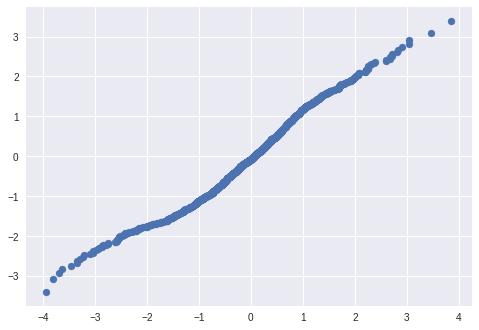

In [378]:
# we first order the r-student residuals

from scipy.stats import norm

r_stu_res_out_sorted = np.sort(r_stu_res)
P_i_out = np.zeros(n_out);

for i in range(n_out):
  P_i_out[i] = norm.ppf((i + 0.5)/n_out) # since 'i' start from 0

plt.scatter(r_stu_res_out_sorted, P_i_out)

** Plot of residuals against the fitted values **

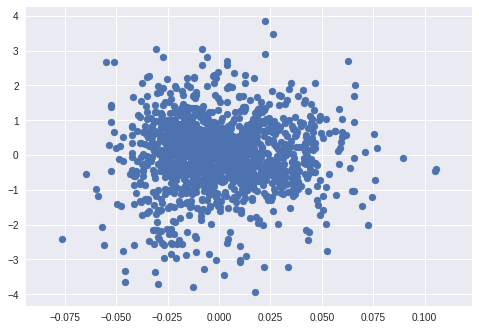

In [379]:
plt.scatter(np.array(y_pred_new_out), np.array(r_stu_res))

** Ridge Regression (Not needed) **

In [380]:
reg_param = np.arange(0, 100, 1)
Id_ridge = np.eye(np.shape(X_new_out_scaled)[1])

beta_ridge = np.zeros((len(reg_param), p))

for j in range(len(reg_param)):
  beta_res = (np.linalg.inv(X_new_out_scaled.transpose()*X_new_out_scaled + reg_param[j]*Id_ridge))*(X_n_out_scaled.transpose()*y_train_out_scaled)
  beta_ridge[j] = np.reshape(beta_res, p)
  

NameError: ignored

No handles with labels found to put in legend.


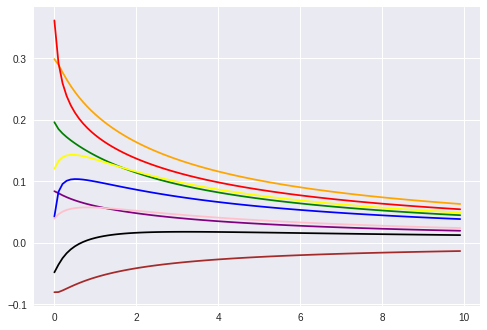

In [246]:
fig, ax = plt.subplots(1,1)

ax.plot(reg_param, beta_ridge[:, [0]], color = 'purple')
ax.plot(reg_param, beta_ridge[:, [1]], color = 'orange')
ax.plot(reg_param, beta_ridge[:, [2]], color = 'green')
ax.plot(reg_param, beta_ridge[:, [3]], color = 'red')
ax.plot(reg_param, beta_ridge[:, [4]], color = 'black')
ax.plot(reg_param, beta_ridge[:, [5]], color = 'brown')
ax.plot(reg_param, beta_ridge[:, [6]], color = 'blue')
ax.plot(reg_param, beta_ridge[:, [7]], color = 'yellow')
ax.plot(reg_param, beta_ridge[:, [8]], color = 'pink')

ax.legend(loc=2, frameon=False)

In [182]:
# might need to do inverse transform before OLS fitting

y_pred_ridge = X_num_out_scaled*np.matrix(beta_ridge[8]).transpose()

res_ridge = y_train_out_scaled - y_pred_ridge 
print("sum of residuals %f" %sum(res_ridge))

n_ridge = np.shape(X_num_out_scaled)[0]
I_ridge = np.eye(n_ridge)
one_mat_ridge = np.ones(n_ridge).reshape((n_ridge, 1))
P_ridge = (1/n_ridge)*np.matmul(one_mat_ridge, one_mat_ridge.transpose())

SSt_ridge = y_train_out_scaled.transpose()*(I_ridge-P_ridge)*y_train_out_scaled

Px_ridge = X_num_out_scaled*np.linalg.inv(X_num_out_scaled.transpose()*X_num_out_scaled)*X_num_out_scaled.transpose()

SSres_ridge = y_train_out_scaled.transpose()*(I_ridge-Px_ridge)*y_train_out_scaled

SSreg_ridge = SSt_ridge - SSres_ridge

R2_ridge = 1 - SSres_ridge/SSt_ridge
print("R2: %f" %R2_ridge)

Adj_R2_ridge = 1 - SSres_ridge*(n_ridge-1)/(SSt_ridge*(n_ridge-p-1))
print("Adj_R2: %f" %Adj_R2_ridge)

MSres_ridge = SSres_ridge/(n_ridge-p-1)
print("MSres: %f" %MSres_ridge)

F_obs_ridge = (SSreg_ridge*(n_ridge-p-1))/(SSres_ridge*p)
print("F_obs: %f" %F_obs_ridge)


sum of residuals -0.000000
R2: 0.881777
Adj_R2: 0.880788
MSres: 0.000082
F_obs: 891.304956
